# Лабораторная работа: Аппроксимация и линеаризация функций


## Вспомогательные функции:
Реализовать функцию, вычисляющую среднеквадратичное отклонение (СКО) набора числовых данных

In [7]:
import numpy as np

def calculate_std(data, approximation):
    """
    Функция для расчета среднеквадратичного отклонения
    data - экспериментальные данные
    approximation - значения по модели
    """
    # считаем разности между реальными и расчетными значениями
    differences = data - approximation
    # возводим в квадрат, складываем и берем корень
    mse = np.mean(differences**2)
    std = np.sqrt(mse)
    return std


# 1: Линейная аппроксимация (МНК)

## Описание
Изучается процесс нагрева воды в электрическом чайнике. Измеряется температура воды 
T в градусах Цельсия в зависимости от времени нагрева 
t в минутах. Из-за постоянного поступления тепла температура воды растёт почти линейно на начальном этапе.

### Задача
Найти линейную зависимость температуры воды от времени нагрева в виде уравнения:
\[
T = a t + b,
\]
### Требуется
- Определить коэффициенты \(a\) и \(b\),
- Построить график зависимости температуры от времени, отображая экспериментальные точки и линию аппроксимации,
- Рассчитать среднеквадратичное отклонение (СКО) между экспериментальными и расчетными значениями температуры, чтобы проверить точность модели.


## Исходные данные

Уравнение линейной аппроксимации: T = 2.4336*t + 19.9045
Среднеквадратичное отклонение: 0.0583°C


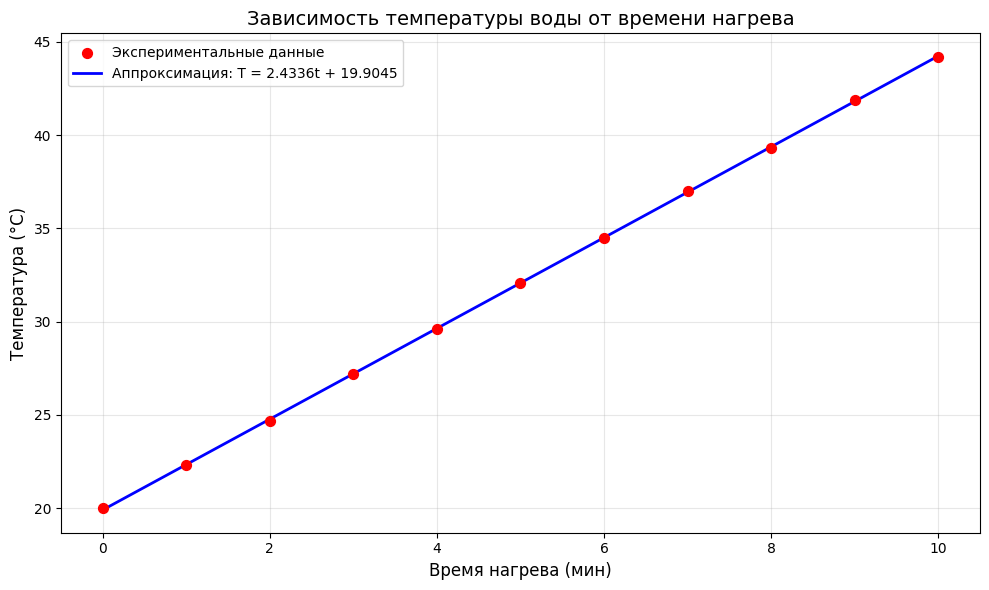

Коэффициент детерминации R²: 0.999943


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Данные: время нагрева (мин) и температура (°C)
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
T = np.array([20.0, 22.3, 24.7, 27.2, 29.6, 32.1, 34.5, 37.0, 39.3, 41.9, 44.2])

# МНК для линейной аппроксимации T = a*t + b
# формулы из лекции для вычисления коэффициентов
n = len(t)
sum_t = np.sum(t)
sum_T = np.sum(T)
sum_t2 = np.sum(t**2)
sum_tT = np.sum(t * T)

# коэффициент наклона
a = (n * sum_tT - sum_t * sum_T) / (n * sum_t2 - sum_t**2)
# свободный член
b = (sum_T - a * sum_t) / n

print(f"Уравнение линейной аппроксимации: T = {a:.4f}*t + {b:.4f}")

# вычисляем значения по модели
T_approx = a * t + b

# считаем СКО
std_dev = calculate_std(T, T_approx)
print(f"Среднеквадратичное отклонение: {std_dev:.4f}°C")

# строим график
plt.figure(figsize=(10, 6))
plt.scatter(t, T, color='red', label='Экспериментальные данные', s=50, zorder=3)
plt.plot(t, T_approx, color='blue', label=f'Аппроксимация: T = {a:.4f}t + {b:.4f}', linewidth=2)
plt.xlabel('Время нагрева (мин)', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.title('Зависимость температуры воды от времени нагрева', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# коэффициент детерминации для оценки качества
R2 = 1 - np.sum((T - T_approx)**2) / np.sum((T - np.mean(T))**2)
print(f"Коэффициент детерминации R²: {R2:.6f}")


# 2: Линеаризация экспоненциальной функции

## Описание
Изучается процесс разрядки аккумулятора мобильного устройства. Известно, что напряжение аккумулятора \( V(t) \) со временем уменьшается по экспоненциальному закону:
$V(t) = a \cdot e^{bt}$

Требуется:
- Линеаризовать экспоненциальную функцию,
- Найти параметры \( a \) и \( b \),
- Построить график зависимости напряжения от времени (экспериментальные данные и аппроксимация),
- Спрогнозировать дальнейшее падение напряжения,
- Рассчитать среднеквадратичное отклонение (СКО).

## Исходные данные

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Данные разрядки аккумулятора
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])




## Процесс линеаризации

**Шаг 1:** Исходная функция: $T(t) = a \cdot e^{bt}$

**Шаг 2:** Логарифмируем обе части:
$\ln(T) = \ln(a) + bt$

**Шаг 3:** Делаем замены: $g = \ln(T)$, $t = t$, $c = \ln(a)$, $d = b$

**Шаг 4:** Получаем линейную функцию: $g = c + d \cdot t$

Параметры экспоненциальной функции:
V(t) = 4.1883 * e^(-0.014886*t)
a = 4.1883, b = -0.014886

Среднеквадратичное отклонение: 0.0274 В
Коэффициент детерминации R²: 0.988670


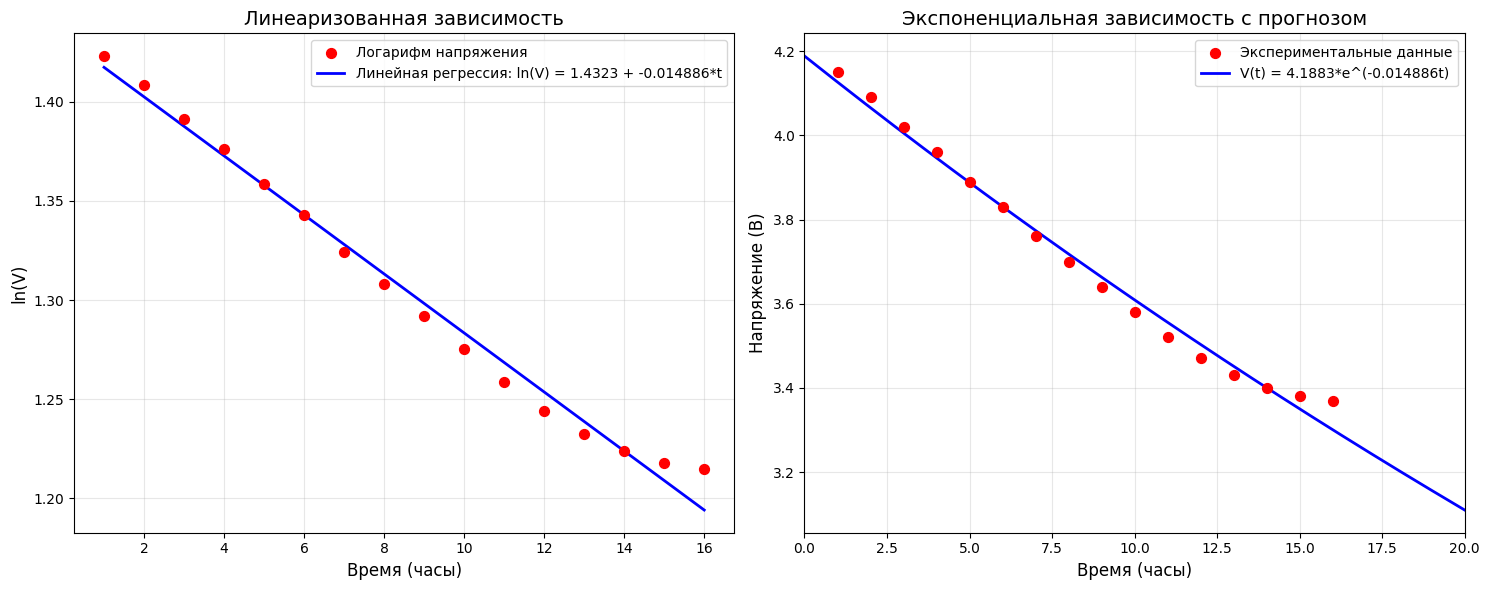


Прогноз напряжения:
Через 18 часов: 3.2038 В
Через 20 часов: 3.1099 В
Через 24 часов: 2.9301 В


In [10]:
# Линеаризация экспоненциальной функции V(t) = a * e^(b*t)
# логарифмируем: ln(V) = ln(a) + b*t

# переходим в логарифмическую шкалу
ln_voltage = np.log(voltage)

# теперь делаем линейную регрессию для ln(V) = c + d*t
n = len(hours)
sum_h = np.sum(hours)
sum_lnV = np.sum(ln_voltage)
sum_h2 = np.sum(hours**2)
sum_h_lnV = np.sum(hours * ln_voltage)

# находим коэффициенты линейной регрессии
d = (n * sum_h_lnV - sum_h * sum_lnV) / (n * sum_h2 - sum_h**2)
c = (sum_lnV - d * sum_h) / n

# возвращаемся к исходным параметрам
b = d  # это уже наш коэффициент b
a = np.exp(c)  # ln(a) = c => a = e^c

print(f"Параметры экспоненциальной функции:")
print(f"V(t) = {a:.4f} * e^({b:.6f}*t)")
print(f"a = {a:.4f}, b = {b:.6f}")

# вычисляем значения по модели
voltage_approx = a * np.exp(b * hours)

# СКО для исходных данных
std_dev = calculate_std(voltage, voltage_approx)
print(f"\nСреднеквадратичное отклонение: {std_dev:.4f} В")

# коэффициент детерминации
R2 = 1 - np.sum((voltage - voltage_approx)**2) / np.sum((voltage - np.mean(voltage))**2)
print(f"Коэффициент детерминации R²: {R2:.6f}")

# строим два графика: в линеаризованных координатах и в исходных
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# график 1: линеаризованная зависимость ln(V) от t
axes[0].scatter(hours, ln_voltage, color='red', label='Логарифм напряжения', s=50, zorder=3)
ln_V_line = c + d * hours
axes[0].plot(hours, ln_V_line, color='blue', label=f'Линейная регрессия: ln(V) = {c:.4f} + {d:.6f}*t', linewidth=2)
axes[0].set_xlabel('Время (часы)', fontsize=12)
axes[0].set_ylabel('ln(V)', fontsize=12)
axes[0].set_title('Линеаризованная зависимость', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# график 2: исходная экспоненциальная зависимость
axes[1].scatter(hours, voltage, color='red', label='Экспериментальные данные', s=50, zorder=3)
# прогноз на будущее (до 20 часов)
hours_extended = np.linspace(0, 20, 200)
voltage_extended = a * np.exp(b * hours_extended)
axes[1].plot(hours_extended, voltage_extended, color='blue', label=f'V(t) = {a:.4f}*e^({b:.6f}t)', linewidth=2)
axes[1].set_xlabel('Время (часы)', fontsize=12)
axes[1].set_ylabel('Напряжение (В)', fontsize=12)
axes[1].set_title('Экспоненциальная зависимость с прогнозом', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 20)

plt.tight_layout()
plt.show()

# прогноз напряжения на 18, 20 и 24 часа
print(f"\nПрогноз напряжения:")
for t in [18, 20, 24]:
    V_pred = a * np.exp(b * t)
    print(f"Через {t} часов: {V_pred:.4f} В")

# Вариант задание выбирается Номер в списке % 3

# Задание 3 Вариант 0

## Описание задачи
При исследовании зависимости силы трения от нормальной нагрузки получены следующие экспериментальные данные:

| Нормальная сила (Н) | 1 | 2 | 3 | 5 | 8 | 10 | 15 | 20 |
|---|---|---|---|---|---|---|---|---|
| Сила трения (Н) | 0.30 | 0.88 | 1.65 | 4.08 | 10.21 | 15.95 | 35.70 | 63.50 |

## Задание
1. Предположите **степенную функцию** вида $f = c \cdot N^\alpha$.
2. Выполните **логарифмическую линеаризацию**: прологарифмируйте обе части уравнения и получите $\ln f = \ln c + \alpha \ln N$.
3. Постройте **линейную регрессию** для преобразованных координат $(\ln N, \ln f)$.
4. Найдите параметры $c$ и $\alpha$, вычислите $R^2$.
5. Постройте **графики** в логарифмических координатах (линия регрессии) и в исходных координатах (степенная функция через исходные данные).
6. Используя полученную модель, предскажите силу трения при нормальной силе 25 Н.

---

# Задание 3 Вариант 1

## Описание задачи
Биологи проводили сравнительное исследование интенсивности основного обмена (BMR, Basal Metabolic Rate) у различных млекопитающих в зависимости от их массы тела. Согласно эмпирическому закону Клейбера, метаболизм животного подчиняется степенной зависимости. Полученные экспериментальные данные:

| Вид животного | Масса (кг) | Основной обмен (ккал/день) |
|---|---|---|
| Мышь | 0.03 | 1.2 |
| Крыса | 0.2 | 5.8 |
| Кролик | 2.0 | 45.0 |
| Кошка | 4.5 | 110.0 |
| Собака | 15 | 380.0 |
| Обезьяна | 35 | 920.0 |
| Человек | 70 | 1850.0 |
| Лошадь | 450 | 10500.0 |
| Слон | 5000 | 95000.0 |

## Задание

1. Предположите **степенную зависимость** вида $BMR = c \cdot M^\alpha$, где $M$ — масса животного, $BMR$ — основной обмен, $c$ и $\alpha$ — параметры модели.

2. Выполните **логарифмическую линеаризацию**: преобразуйте исходные координаты, взяв логарифмы обеих частей:
   $\ln(BMR) = \ln(c) + \alpha \ln(M)$

3. Постройте **линейную регрессию** для преобразованных координат $(\ln M, \ln BMR)$:
   - Найдите параметры линии регрессии
   - Вычислите $R^2$ для линеаризованной модели
   - Оцените погрешность определения параметров

4. Восстановите исходные параметры степенной функции:
   - Найдите $c = e^b$, где $b$ — свободный член линейной регрессии
   - Получите показатель степени $\alpha$

5. Создайте **комплексную визуализацию**:
   - График в логарифмических координатах $(\ln M, \ln BMR)$ с линией регрессии
   - График в исходных координатах с степенной кривой
   - График остатков в обоих представлениях

6. Вычислите **коэффициент детерминации** $R^2$ для исходной степенной модели и сравните с линеаризованной.

7. Проанализируйте результаты:
   - Согласуется ли найденное значение $\alpha$ с известным результатом Клейбера (теоретически $\alpha \approx 0.75$)?
   - Что означает показатель степени $\alpha$ с физиологической точки зрения?
   - Как соотносятся поверхность и объём тела животного с показателем 0.75?

8. Используя полученную модель, предскажите основной обмен для:
   - Льва массой 190 кг
   - Енота массой 8 кг
   - Синего кита массой 150 000 кг

---

# Задание 3 Вариант 2

## Описание задачи
При исследовании освещённости поверхности в зависимости от расстояния до точечного источника света проведены измерения интенсивности света. Теоретически свет распространяется по закону обратных квадратов, но из-за рассеяния и поглощения в атмосфере показатель степени может отличаться от -2. Экспериментальные данные:

| Расстояние (м) | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|---|---|---|---|---|---|---|---|---|---|---|
| Интенсивность (люкс) | 2000 | 520 | 235 | 135 | 87 | 62 | 35 | 23 | 16 | 12 |

## Задание

1. Предположите **степенную функцию** вида $I = c \cdot r^\alpha$, где $r$ — расстояние до источника, $I$ — интенсивность света, $c$ и $\alpha$ — параметры.

2. Выполните **двойную логарифмическую линеаризацию**:
   $\ln(I) = \ln(c) + \alpha \ln(r)$

3. Постройте **линейную регрессию** для координат $(\ln r, \ln I)$:
   - Найдите коэффициенты регрессии
   - Вычислите коэффициент корреляции и $R^2$
   - Определите доверительный интервал для параметра $\alpha$

4. Восстановите параметры степенной функции $c$ и $\alpha$.

5. Выполните **анализ отклонений от теории**:
   - Сравните полученное значение $\alpha$ с теоретическим $\alpha = -2$
   - Объясните причины отклонения (рассеяние, поглощение, асферичность источника)

6. Создайте **графики**:
   - Двойной логарифмический график с линией регрессии
   - Исходные данные в линейном масштабе со степенной кривой
   - График остатков с выявлением систематических погрешностей

7. Вычислите **относительную ошибку** для каждой точки в процентах:
   $\delta_i = \frac{|I_{измеренная} - I_{предсказанная}|}{I_{измеренная}} \times 100\%$

8. Определите, в каком диапазоне расстояний модель работает наиболее точно, и объясните причины изменения точности.

9. Используя полученную модель, предскажите интенсивность света на расстояниях:
   - 0.3 м (экстраполяция в близкую область)
   - 10 м (экстраполяция в дальнюю область)
   - Оцените надежность предсказаний


Степенная функция: f = 0.2557 * N^1.8021
Параметры: c = 0.2557, α = 1.8021

Коэффициент детерминации R²: 0.984678
Среднеквадратичное отклонение: 2.5886 Н


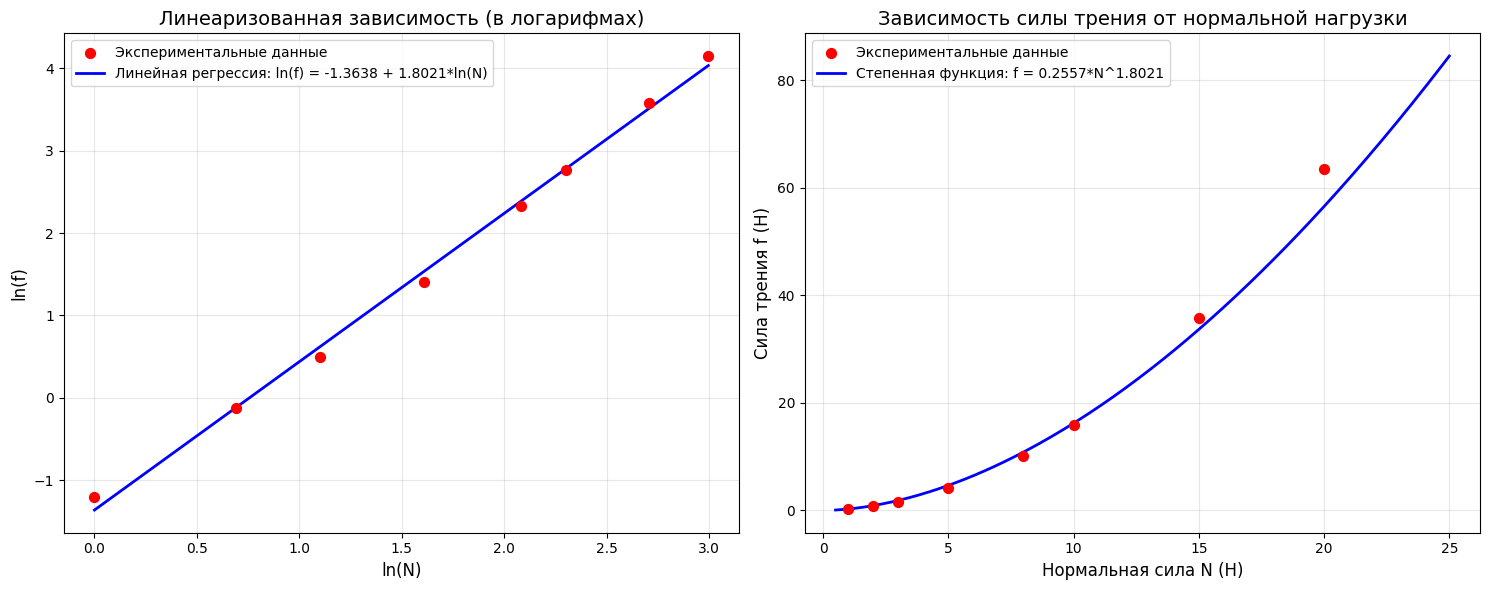


Прогноз:
При нормальной силе 25 Н сила трения составит: 84.51 Н

Анализ отклонений по точкам:
N =  1 Н: эксп. =  0.30 Н, модель =  0.26 Н, относительная ошибка = 14.77%
N =  2 Н: эксп. =  0.88 Н, модель =  0.89 Н, относительная ошибка = 1.32%
N =  3 Н: эксп. =  1.65 Н, модель =  1.85 Н, относительная ошибка = 12.21%
N =  5 Н: эксп. =  4.08 Н, модель =  4.65 Н, относительная ошибка = 13.93%
N =  8 Н: эксп. = 10.21 Н, модель = 10.84 Н, относительная ошибка = 6.20%
N = 10 Н: эксп. = 15.95 Н, модель = 16.21 Н, относительная ошибка = 1.63%
N = 15 Н: эксп. = 35.70 Н, модель = 33.66 Н, относительная ошибка = 5.71%
N = 20 Н: эксп. = 63.50 Н, модель = 56.53 Н, относительная ошибка = 10.98%


In [11]:
# Задание 3: Вариант 0 - Зависимость силы трения от нормальной нагрузки
# Степенная функция f = c * N^α

# исходные данные
N = np.array([1, 2, 3, 5, 8, 10, 15, 20])  # нормальная сила (Н)
f = np.array([0.30, 0.88, 1.65, 4.08, 10.21, 15.95, 35.70, 63.50])  # сила трения (Н)

# логарифмическая линеаризация: ln(f) = ln(c) + α*ln(N)
ln_N = np.log(N)
ln_f = np.log(f)

# линейная регрессия для логарифмов
n = len(N)
sum_lnN = np.sum(ln_N)
sum_lnf = np.sum(ln_f)
sum_lnN2 = np.sum(ln_N**2)
sum_lnN_lnf = np.sum(ln_N * ln_f)

# находим коэффициенты
alpha = (n * sum_lnN_lnf - sum_lnN * sum_lnf) / (n * sum_lnN2 - sum_lnN**2)
ln_c = (sum_lnf - alpha * sum_lnN) / n
c = np.exp(ln_c)

print(f"Степенная функция: f = {c:.4f} * N^{alpha:.4f}")
print(f"Параметры: c = {c:.4f}, α = {alpha:.4f}")

# вычисляем значения по модели
f_approx = c * N**alpha

# коэффициент детерминации для исходных данных
R2 = 1 - np.sum((f - f_approx)**2) / np.sum((f - np.mean(f))**2)
print(f"\nКоэффициент детерминации R²: {R2:.6f}")

# СКО
std_dev = calculate_std(f, f_approx)
print(f"Среднеквадратичное отклонение: {std_dev:.4f} Н")

# строим графики
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# график 1: в логарифмических координатах
axes[0].scatter(ln_N, ln_f, color='red', label='Экспериментальные данные', s=50, zorder=3)
ln_f_line = ln_c + alpha * ln_N
axes[0].plot(ln_N, ln_f_line, color='blue', label=f'Линейная регрессия: ln(f) = {ln_c:.4f} + {alpha:.4f}*ln(N)', linewidth=2)
axes[0].set_xlabel('ln(N)', fontsize=12)
axes[0].set_ylabel('ln(f)', fontsize=12)
axes[0].set_title('Линеаризованная зависимость (в логарифмах)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# график 2: в исходных координатах
axes[1].scatter(N, f, color='red', label='Экспериментальные данные', s=50, zorder=3)
# строим плавную кривую для наглядности
N_extended = np.linspace(0.5, 25, 200)
f_extended = c * N_extended**alpha
axes[1].plot(N_extended, f_extended, color='blue', label=f'Степенная функция: f = {c:.4f}*N^{alpha:.4f}', linewidth=2)
axes[1].set_xlabel('Нормальная сила N (Н)', fontsize=12)
axes[1].set_ylabel('Сила трения f (Н)', fontsize=12)
axes[1].set_title('Зависимость силы трения от нормальной нагрузки', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# прогноз для N = 25 Н
N_pred = 25
f_pred = c * N_pred**alpha
print(f"\nПрогноз:")
print(f"При нормальной силе {N_pred} Н сила трения составит: {f_pred:.2f} Н")

# дополнительный анализ - проверим отклонения для каждой точки
print(f"\nАнализ отклонений по точкам:")
for i in range(len(N)):
    relative_error = abs(f[i] - f_approx[i]) / f[i] * 100
    print(f"N = {N[i]:2.0f} Н: эксп. = {f[i]:5.2f} Н, модель = {f_approx[i]:5.2f} Н, относительная ошибка = {relative_error:.2f}%")